In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2023-06-22,29890.5,29992.8,30497.8,29590.4,52350439455487,1000988,547153915,1.650655e+06,1.292778e+06,...,1872.32,85.97,0.49401,0.065567,3.8900,1923.70,22.467,4381.89,33445.0,34210.0
1,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0
2,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
3,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
4,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2657,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2658,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2659,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0


In [10]:

df=df[::-1]
df=df.reset_index(drop=True)
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,415.8,412.8,417.5,410.3,158427203767,445273,426654988,6.881532e+05,1.731272e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
1,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
3,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
4,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
2657,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
2658,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
2659,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0


In [12]:
X_df = df.drop(columns=["BTC_close"])
y_df = df["BTC_close"]

In [13]:
X_df['Date'] = pd.to_datetime(X_df['Date'])

In [14]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, shuffle=False)
X_val_df, X_test_df, y_val_df, y_test_df = train_test_split(X_test_df, y_test_df, test_size=0.5, shuffle=False)
X_train_df[0:10]

,Date,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,mean_hash_rate,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,412.8,417.5,410.3,158427203767,445273,426654988,688153.206452,17312.723752,1.220696e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-03-11,415.8,422.4,415.1,158427203767,434658,398582424,622785.037500,17101.930760,1.260073e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-03-12,419.1,420.7,407.0,158427203767,374730,331208848,575015.361111,13984.439830,1.134066e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-03-13,410.4,415.9,409.6,158427203767,421585,334817852,629356.864662,14606.780891,1.047436e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-03-14,412.4,416.1,411.2,158427203767,451902,437739524,719966.322368,16892.976657,1.197070e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-03-15,414.3,417.4,412.3,158427203767,451559,428201964,664909.881988,18023.057239,1.267949e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-03-16,415.1,417.0,413.3,158427203767,449250,409739696,673913.973684,20007.570782,1.197070e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-03-17,415.9,419.6,415.3,158427203767,482125,423304328,750539.588652,19285.471320,1.110440e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-03-18,418.2,418.6,402.5,165496835118,425769,394743504,725631.441176,17405.002485,1.099529e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016-03-19,408.2,410.5,402.1,165496835118,428645,354851572,652300.683824,14197.590847,1.118857e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_train_df.shape,X_val_df.shape,X_test_df.shape

((1862, 22), (399, 22), (400, 22))

In [16]:
X_df['year'] = pd.to_datetime(X_df['Date']).dt.year
X_df['month'] = pd.to_datetime(X_df['Date']).dt.month
X_df['day'] = pd.to_datetime(X_df['Date']).dt.day

In [18]:
score = 1
for n_estimators in [50,75,100,125,150,175,200,250,275,300,325,350]:
  for learning_rate in [0.01,0.15,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.75,0.08,0.85,0.09,0.95,0.1,1,5,10]:
 # for each combination of parameters, train an SVC
    model = AdaBoostRegressor(n_estimators=n_estimators,learning_rate=learning_rate,random_state=0)
    model.fit(X_train_df.drop('Date', axis=1)[:-1], y_train_df[1:])
 # evaluate the SVC on the test set
    y_val_pred = model.predict(X_val_df.drop('Date', axis=1))[:-1].reshape(-1,1)
    y_val_df = y_val_df.ravel()
    y_val_pred = y_val_pred.ravel()
 # if we got a better score, store the score and parameters
    if  r2_score(y_val_df[1:], y_val_pred)< score:
      score = r2_score(y_val_df[1:], y_val_pred)
      best_parameters = {'n_estimators': n_estimators, 'learning_rate':learning_rate}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.82
Best parameters: {'n_estimators': 125, 'learning_rate': 0.95}


In [60]:
model=AdaBoostRegressor(estimator=None, n_estimators=125, learning_rate=0.95, loss='linear', base_estimator='deprecated',random_state=0)

In [61]:
X_new_train_df, X_test_df, y_new_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)

In [62]:
model.fit(X_new_train_df.drop('Date', axis=1)[:-1], y_new_train_df[1:])

AdaBoostRegressor(learning_rate=0.95, n_estimators=125, random_state=0)

In [63]:
y_new_train_pred = model.predict(X_new_train_df.drop('Date', axis=1)[:-1])
y_new_train_pred[:20]

array([3223.43692308, 3223.43692308, 3223.43692308, 3223.43692308,
       3223.43692308, 3223.43692308, 3223.43692308, 3223.43692308,
       3223.43692308, 3223.43692308, 3223.43692308, 3223.43692308,
       3223.43692308, 3223.43692308, 3223.43692308, 3223.43692308,
       3223.43692308, 3223.43692308, 3223.43692308, 3223.43692308])

In [64]:
y_new_train_df = y_new_train_df.ravel()
y_new_train_pred = y_new_train_pred.ravel()

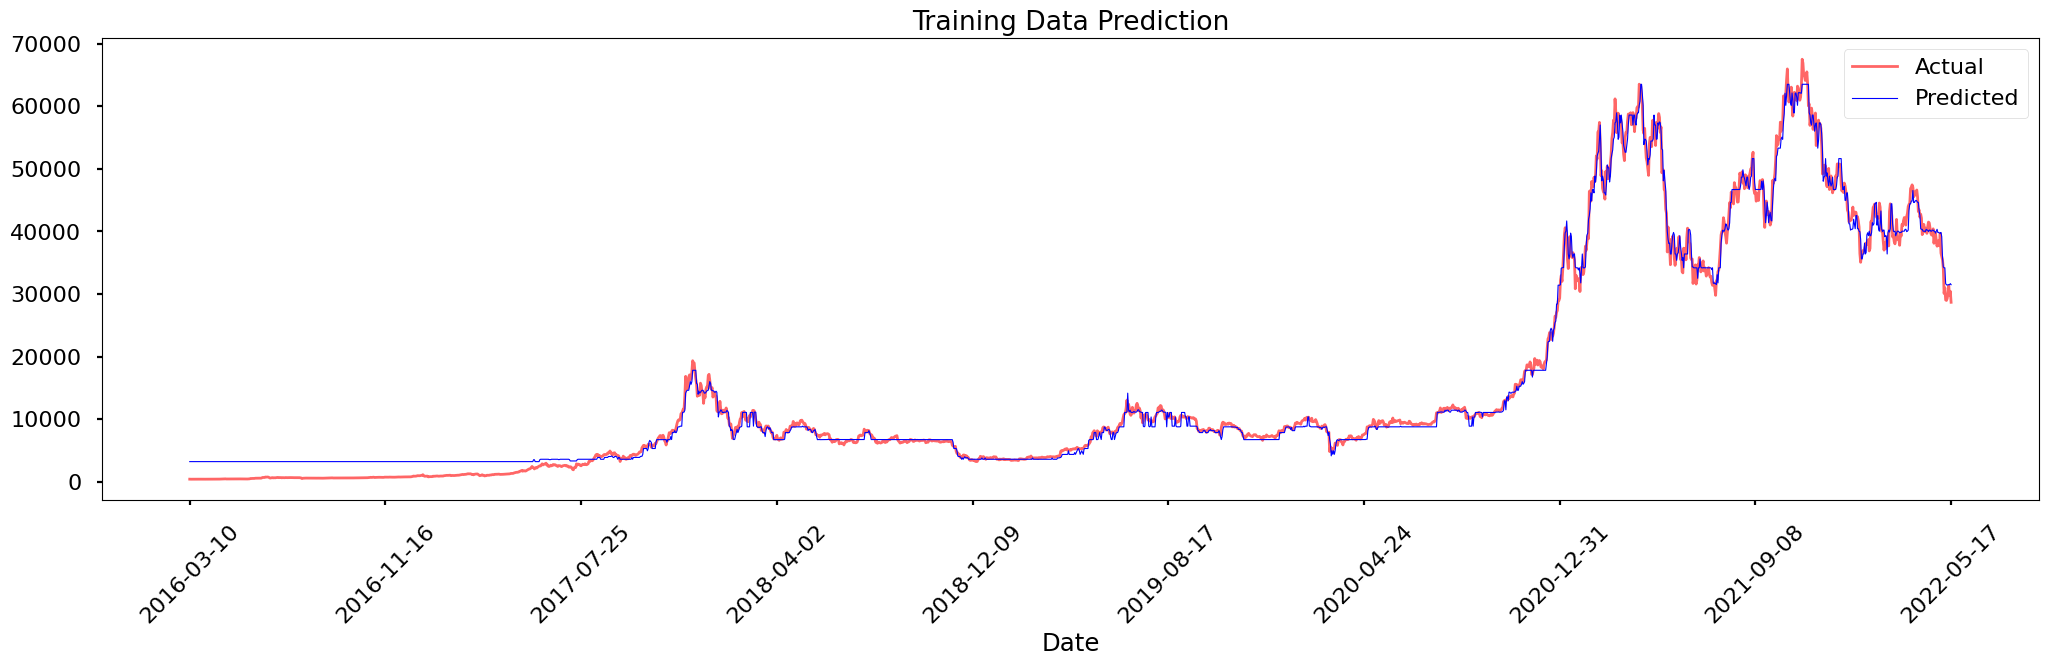

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of visible x-axis tick labels
num_ticks = 10  # Adjust the number of ticks as needed

plt.figure(figsize=(25, 6))
plt.plot(df.Date[1:len(y_new_train_df)], y_new_train_df[1:], color='red', linewidth=2.0, alpha=0.6)
plt.plot(df.Date[1:len(y_new_train_df)], y_new_train_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Date')
plt.title("Training Data Prediction")

# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[1:len(y_new_train_df)])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[x_ticks], rotation=45)  # Adjust rotation angle as needed

plt.show()


In [66]:
y_test_pred=model.predict(X_test_df.drop('Date', axis=1)[:-1])
y_test_pred[0:10]

array([31493.10059524, 31493.10059524, 31493.10059524, 31493.10059524,
       31493.10059524, 31493.10059524, 31493.10059524, 31418.08717949,
       31418.08717949, 31493.10059524])

In [67]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [68]:
len(y_test_df)

400

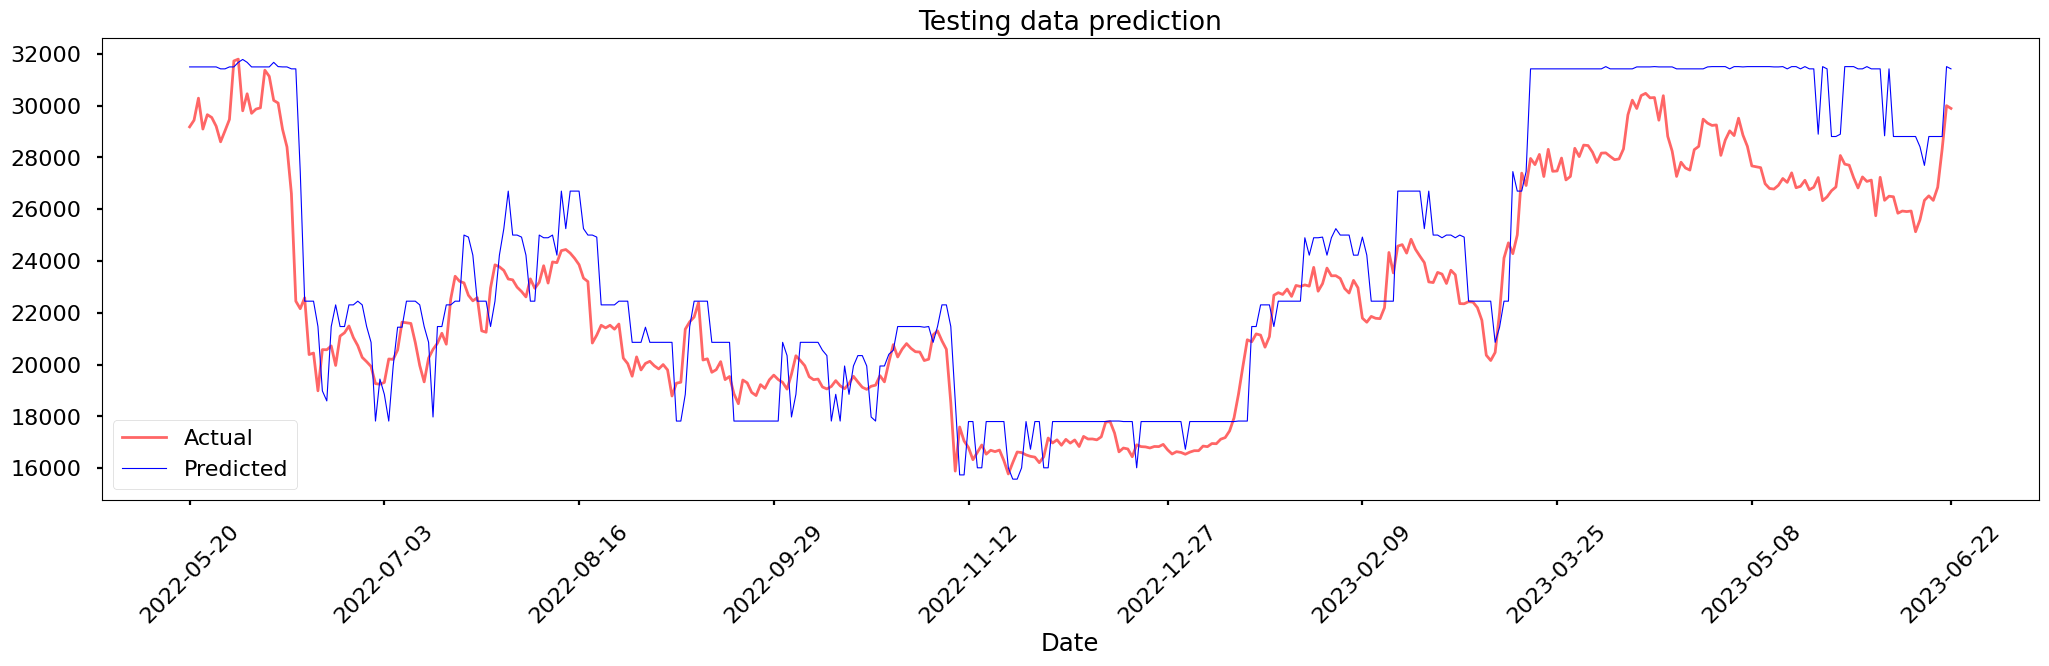

In [69]:
num_ticks = 10  # Adjust the number of ticks as needed
plt.figure(figsize=(25,6))
plt.plot(df.Date[len(y_train_df)+len(y_val_df)+1:], y_test_df[1:], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df.Date[len(y_train_df)+len(y_val_df)+1:], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[len(y_train_df)+len(y_val_df)+1:])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[len(y_train_df)+len(y_val_df)+1+x_ticks], rotation=45)  # Adjust rotation angle as needed
plt.show()

In [70]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_new_train_df[1:],y_new_train_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_new_train_df[1:],y_new_train_pred))
print("R2 score:", r2_score(y_new_train_df[1:],y_new_train_pred))
print("Test accuracy for test set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test_df[1:],y_test_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test_df[1:],y_test_pred))
print("R2 score:", r2_score(y_test_df[1:],y_test_pred))


Test accuracy for train set
Root Mean Square Error (RMSE): 1508.1468779058844
 Mean Absolute Percentage Error (MAPE): 0.772414951575128
R2 score: 0.9924224732570723
Test accuracy for test set
Root Mean Square Error (RMSE): 2173.5469662290884
 Mean Absolute Percentage Error (MAPE): 0.07533178863982484
R2 score: 0.734620641209439
